# Model Comparison and Selection

# 1. Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
import pickle
import time
import os
import warnings
warnings.filterwarnings('ignore')

In [40]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# 2. Load Test Data

Load test data for evaluation

In [41]:
X_test = np.load("../data/processed/ml_ready/X_test_scaled.npy")
y_test = np.load("../data/processed/ml_ready/y_test.npy")

In [42]:
with open("../models/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

In [43]:
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_test.shape[1]}")
print(f"Classes: {len(label_encoder.classes_)}")


Test samples: 440
Features: 39
Classes: 22


# 3. Load All Trained Models

In [44]:
print("\nLoading all trained models...\n")
models = {}


Loading all trained models...



In [45]:
with open('../models/logistic_regression_model.pkl', 'rb') as f:
    models['Logistic Regression'] = pickle.load(f)
print("Logistic Regression loaded")

Logistic Regression loaded


In [46]:
with open('../models/decision_tree_model.pkl', 'rb') as f:
    models['Decision Tree'] = pickle.load(f)
print("Decision Tree loaded")

Decision Tree loaded


In [47]:
with open('../models/random_forest_model.pkl', 'rb') as f:
    models['Random Forest'] = pickle.load(f)
print("Random Forest loaded")

Random Forest loaded


In [48]:
with open('../models/svm_model.pkl', 'rb') as f:
    models['SVM'] = pickle.load(f)
print("SVM loaded")

SVM loaded


In [49]:
with open('../models/boosting_models/xgboost_model.pkl', 'rb') as f:
    models['XGBoost'] = pickle.load(f)
print("XGBoost loaded")

XGBoost loaded


In [50]:
with open('../models/boosting_models/lightgbm_model.pkl', 'rb') as f:
    models['LightGBM'] = pickle.load(f)
print("LightGBM loaded")

LightGBM loaded


In [51]:
with open('../models/ensemble/stacking_ensemble.pkl', 'rb') as f:
    models['Stacking Ensemble'] = pickle.load(f)
print("Stacking Ensemble loaded")


Stacking Ensemble loaded


In [52]:
print(f"Total models loaded: {len(models)}")

Total models loaded: 7


# 4. Evaluate All Models

In [53]:
print("Evaluating models on the test set...\n")

Evaluating models on the test set...



In [54]:
results = []

for name, model in models.items():
    # Prediction time
    start = time.time()
    y_pred = model.predict(X_test)
    pred_time = (time.time() - start) * 1000  # ms
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Model size
    if 'Stacking' in name:
        model_path = '../models/ensemble/stacking_ensemble.pkl'
    elif 'XGBoost' in name:
        model_path = '../models/boosting_models/xgboost_model.pkl'
    elif 'LightGBM' in name:
        model_path = '../models/boosting_models/lightgbm_model.pkl'
    else:
        model_path = f'../models/{name.lower().replace(" ", "_")}_model.pkl'
    
    try:
        size_mb = os.path.getsize(model_path) / (1024 * 1024)
    except:
        size_mb = 0
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Pred_Time_ms': pred_time,
        'Size_MB': size_mb
    })
    
    print(f"{name}: {acc*100:.2f}% accuracy | {pred_time:.2f}ms")

Logistic Regression: 97.73% accuracy | 0.96ms
Decision Tree: 95.68% accuracy | 0.59ms
Random Forest: 99.32% accuracy | 93.32ms
SVM: 97.95% accuracy | 43.94ms
XGBoost: 98.64% accuracy | 91.78ms
LightGBM: 98.41% accuracy | 58.19ms
Stacking Ensemble: 99.32% accuracy | 136.50ms


In [55]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
results_df['Rank'] = range(1, len(results_df) + 1)

# 5.Results Summary Table

In [56]:
display_df = results_df.copy()
display_df['Accuracy'] = display_df['Accuracy'].apply(lambda x: f"{x*100:.2f}%")
display_df['Precision'] = display_df['Precision'].apply(lambda x: f"{x*100:.2f}%")
display_df['Recall'] = display_df['Recall'].apply(lambda x: f"{x*100:.2f}%")
display_df['F1-Score'] = display_df['F1-Score'].apply(lambda x: f"{x*100:.2f}%")
display_df['Pred_Time_ms'] = display_df['Pred_Time_ms'].apply(lambda x: f"{x:.2f}")
display_df['Size_MB'] = display_df['Size_MB'].apply(lambda x: f"{x:.2f}")

In [57]:
print("Model Comparison Summary (Ranked by Accuracy):")
print(display_df[['Rank', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Pred_Time_ms', 'Size_MB']].to_string(index=False))

Model Comparison Summary (Ranked by Accuracy):
 Rank               Model Accuracy Precision Recall F1-Score Pred_Time_ms Size_MB
    1       Random Forest   99.32%    99.35% 99.32%   99.32%        93.32    2.92
    2   Stacking Ensemble   99.32%    99.37% 99.32%   99.32%       136.50   13.37
    3             XGBoost   98.64%    98.68% 98.64%   98.63%        91.78    3.58
    4            LightGBM   98.41%    98.48% 98.41%   98.41%        58.19    3.00
    5                 SVM   97.95%    98.09% 97.95%   97.94%        43.94    0.31
    6 Logistic Regression   97.73%    97.93% 97.73%   97.71%         0.96    0.01
    7       Decision Tree   95.68%    95.92% 95.68%   95.70%         0.59    0.02


# 6. Visualization: Accuracy Comparison

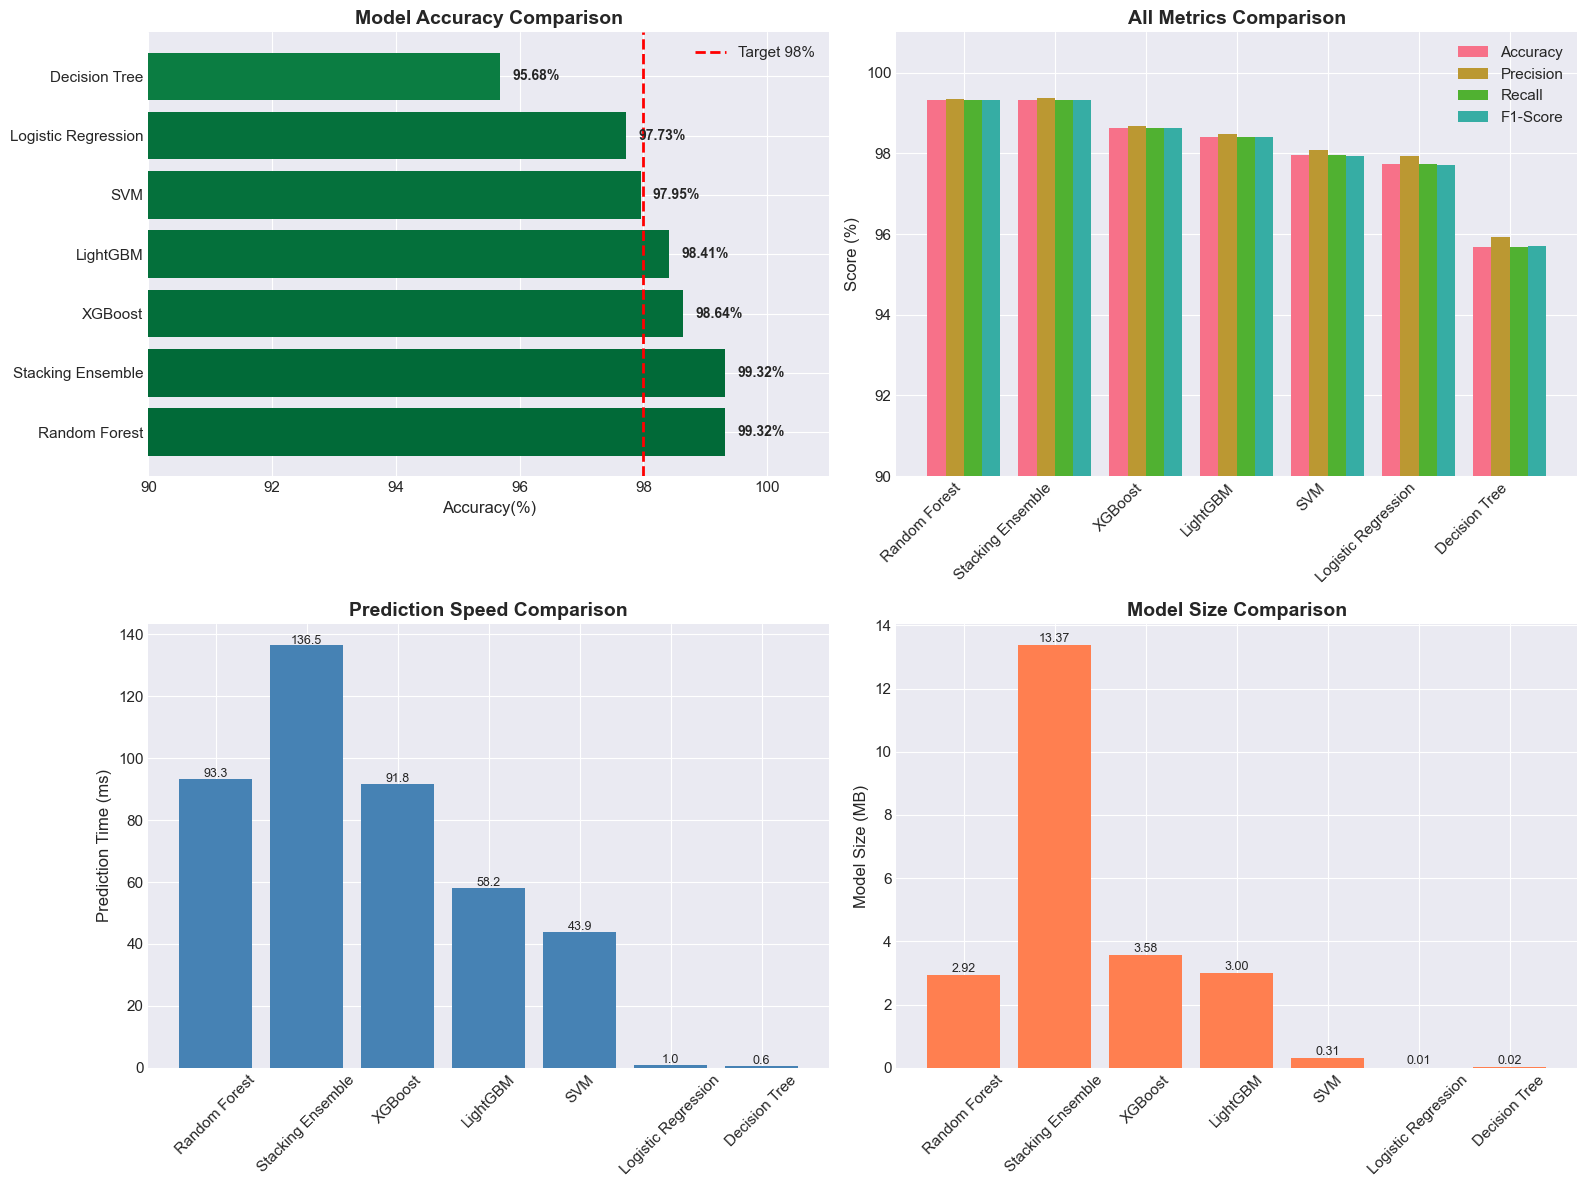

Saved: ../data/visualizations/48_model_comparison_all.png


In [58]:
fig,axes=plt.subplots(2,2,figsize=(16,12))

# 1. Accuracy Bar Chart
colors = plt.cm.RdYlGn(results_df['Accuracy'].values)
bars = axes[0,0].barh(results_df['Model'], results_df['Accuracy']*100, color=colors)
axes[0,0].axvline(x=98, color='red', linestyle='--', linewidth=2, label='Target 98%')
axes[0,0].set_xlim(90, 101)
axes[0,0].set_xlabel('Accuracy(%)', fontsize=12)
axes[0,0].set_title('Model Accuracy Comparison', fontweight='bold', fontsize=14)
axes[0,0].legend()

for bar, acc in zip(bars, results_df['Accuracy']):
    axes[0,0].text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
                   f'{acc*100:.2f}%', va='center', fontsize=10, fontweight='bold')

# 2. All Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2
for i, metric in enumerate(metrics):
    axes[0,1].bar(x + i*width, results_df[metric]*100, width, label=metric)
axes[0,1].set_xticks(x + width*1.5)
axes[0,1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0,1].set_ylabel('Score (%)', fontsize=12)
axes[0,1].set_title('All Metrics Comparison', fontweight='bold', fontsize=14)
axes[0,1].legend()
axes[0,1].set_ylim(90, 101)

# 3. Prediction Time
bars = axes[1,0].bar(results_df['Model'], results_df['Pred_Time_ms'], color='steelblue')
axes[1,0].set_ylabel('Prediction Time (ms)', fontsize=12)
axes[1,0].set_title('Prediction Speed Comparison', fontweight='bold', fontsize=14)
axes[1,0].tick_params(axis='x', rotation=45)
for bar, t in zip(bars, results_df['Pred_Time_ms']):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{t:.1f}', ha='center', fontsize=9)
    
# 4. Model Size
bars = axes[1,1].bar(results_df['Model'], results_df['Size_MB'], color='coral')
axes[1,1].set_ylabel('Model Size (MB)', fontsize=12)
axes[1,1].set_title('Model Size Comparison', fontweight='bold', fontsize=14)
axes[1,1].tick_params(axis='x', rotation=45)
for bar, s in zip(bars, results_df['Size_MB']):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   f'{s:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../data/visualizations/48_model_comparison_all.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: ../data/visualizations/48_model_comparison_all.png")

# 7. Radar Chart - Multi-Metric Comparison

In [59]:
from math import pi

 Prepare data for radar chart (top 4 models)

In [60]:
top_models=results_df.head(4)
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N=len(categories)

Create angles

In [61]:
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

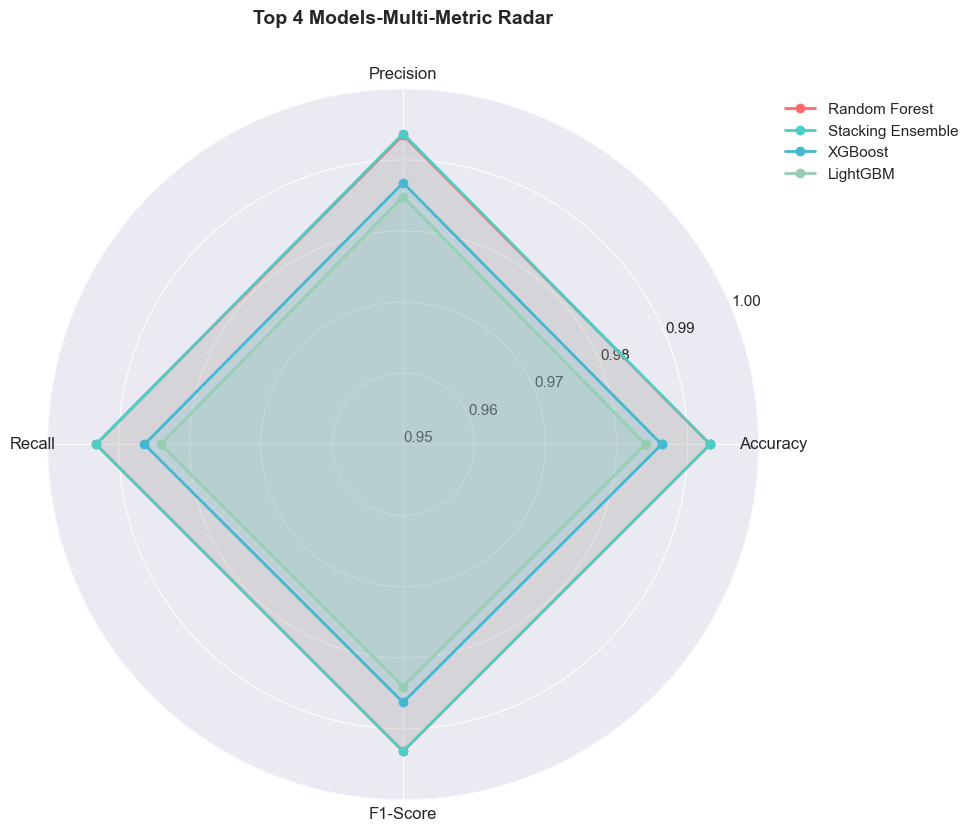

Saved: ../data/visualizations/49_model_radar_chart.png


In [62]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for idx, (_, row) in enumerate(top_models.iterrows()):
    values = [row['Accuracy'],row['Precision'], row['Recall'], row['F1-Score']]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'], color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylim(0.95, 1.0)
ax.set_title('Top 4 Models-Multi-Metric Radar', fontweight='bold', fontsize=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.savefig('../data/visualizations/49_model_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: ../data/visualizations/49_model_radar_chart.png")

Model Recommendation Analysis

In [63]:
print("BEST MODEL SELECTION")

best_model = results_df.iloc[0]
best_model_name = best_model['Model']

BEST MODEL SELECTION


In [64]:
print("Model Recommendation Analysis")

Model Recommendation Analysis


In [65]:
best_acc = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"Best Accuracy: {best_acc['Model']} ({best_acc['Accuracy']*100:.2f}%)")

Best Accuracy: Random Forest (99.32%)


In [66]:
best_speed = results_df.loc[results_df['Pred_Time_ms'].idxmin()]
print(f"Fastest Prediction: {best_speed['Model']} ({best_speed['Pred_Time_ms']:.2f}ms)")

Fastest Prediction: Decision Tree (0.59ms)


In [67]:
smallest = results_df.loc[results_df['Size_MB'].idxmin()]
print(f"Smallest Size: {smallest['Model']} ({smallest['Size_MB']:.2f}MB)")


Smallest Size: Logistic Regression (0.01MB)


In [68]:
high_acc = results_df[results_df['Accuracy'] >= 0.98]
if len(high_acc) > 0:
    balanced = high_acc.loc[high_acc['Pred_Time_ms'].idxmin()]
    print(f"Best Balance (>98% acc + fast): {balanced['Model']}")

Best Balance (>98% acc + fast): LightGBM


In [69]:
results_df.to_csv('../data/results/final_model_comparison.csv', index=False)
print("Saved: ../data/results/final_model_comparison.csv")

# Save best model info
best_model_info = {
    'Model': best_model_name,
    'Accuracy': best_model['Accuracy'],
    'Precision': best_model['Precision'],
    'Recall': best_model['Recall'],
    'F1-Score': best_model['F1-Score'],
    'Prediction_Time_ms': best_model['Pred_Time_ms'],
    'Model_Size_MB': best_model['Size_MB']
}

with open('../models/metadata/best_model_info.pkl', 'wb') as f:
    pickle.dump(best_model_info, f)
print("Saved: ../models/metadata/best_model_info.pkl")

Saved: ../data/results/final_model_comparison.csv
Saved: ../models/metadata/best_model_info.pkl
